## 2.2 深度学习基础及数学原理
深度学习并没有想象的那么难，甚至比有些传统的机器学习更简单。所用到的数学知识也不需要特别的高深，本章将会一边讲解深度学习中的基本理论，一边通过动手使用PyTorch实现一些简单的理论，本章内容很多，所以只做一个简短的介绍

## 2.2.1 监督学习和无监督学习
监督学习、无监督学习、半监督学习、强化学习是我们日常接触到的常见的四个机器学习方法：

监督学习：通过已有的训练样本（即已知数据以及其对应的输出）去训练得到一个最优模型（这个模型属于某个函数的集合，最优则表示在某个评价准则下是最佳的），再利用这个模型将所有的输入映射为相应的输出。
无监督学习：它与监督学习的不同之处，在于我们事先没有任何训练样本，而需要直接对数据进行建模。
半监督学习 ：在训练阶段结合了大量未标记的数据和少量标签数据。与使用所有标签数据的模型相比，使用训练集的训练模型在训练时可以更为准确。
强化学习：我们设定一个回报函数（reward function），通过这个函数来确认否越来越接近目标，类似我们训练宠物，如果做对了就给他奖励，做错了就给予惩罚，最后来达到我们的训练目的。
这里我们只着重介绍监督学习，因为我们后面的绝大部们课程都是使用的监督学习的方法，在训练和验证时输入的数据既包含输入x，又包含x对应的输出y，即学习数据已经事先给出了正确答案。

## 2.2.2 线性回归 （Linear Regreesion）
线性回归是利用数理统计中回归分析，来确定两种或两种以上变量间相互依赖的定量关系的一种统计分析方法，运用十分广泛。其表达形式为y = w'x+e，e为误差服从均值为0的正态分布。

回归分析中，只包括一个自变量和一个因变量，且二者的关系可用一条直线近似表示，这种回归分析称为一元线性回归分析。如果回归分析中包括两个或两个以上的自变量，且因变量和自变量之间是线性关系，则称为多元线性回归分析。 摘自百度百科

简单的说： 线性回归对于输入x与输出y有一个映射f，y=f(x),而f的形式为aX+b。其中a和b是两个可调的参数，我们训练的时候就是训练a，b这两个参数。

下面我们来用pyTorch的代码来做一个详细的解释

In [3]:
%matplotlib inline
# 引用
# 注意，这里我们使用了一个新库叫 seaborn 如果报错找不到包的话请使用pip install seaborn 来进行安装
import torch
from torch.nn import Linear, Module, MSELoss
from torch.optim import SGD
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
torch.__version__

'1.3.1+cpu'

下面定义一个线性函数，这里使用 $y = 5x + 7$，这里的5和7就是上面说到的参数a和b，我们先使用matplot可视化一下这个函数

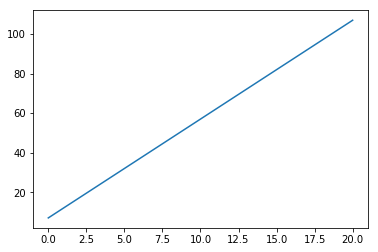

In [4]:
x = np.linspace(0,20,500)
y = 5*x + 7
plt.plot(x,y)

下面我生成一些随机的点，来作为我们的训练数据

In [5]:
x = np.random.rand(256)
noise = np.random.randn(256) / 4
y = x * 5 + 7 + noise
df = pd.DataFrame()
df['x'] = x
df['y'] = y

e:\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


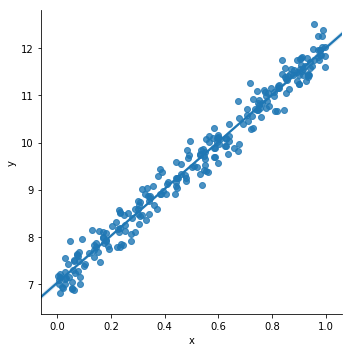

In [6]:
sns.lmplot(x='x', y='y', data=df);

我们随机生成了一些点，下面将使用PyTorch建立一个线性的模型来对其进行拟合，这就是所说的训练的过程，由于只有一层线性模型，所以我们就直接使用了

In [7]:
model=Linear(1, 1)

其中参数(1, 1)代表输入输出的特征(feature)数量都是1. Linear 模型的表达式是 $y=w \cdot x+b$，其中 $w$ 代表权重， $b$ 代表偏置

损失函数我们使用均方损失函数：MSELoss，这个后面会详细介绍

In [8]:
criterion = MSELoss()